In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h4>Initial Exploratory Viz</h4>

In [2]:
df_fulltime = pd.read_csv('241123_archinect_salaries_fulltime.csv')

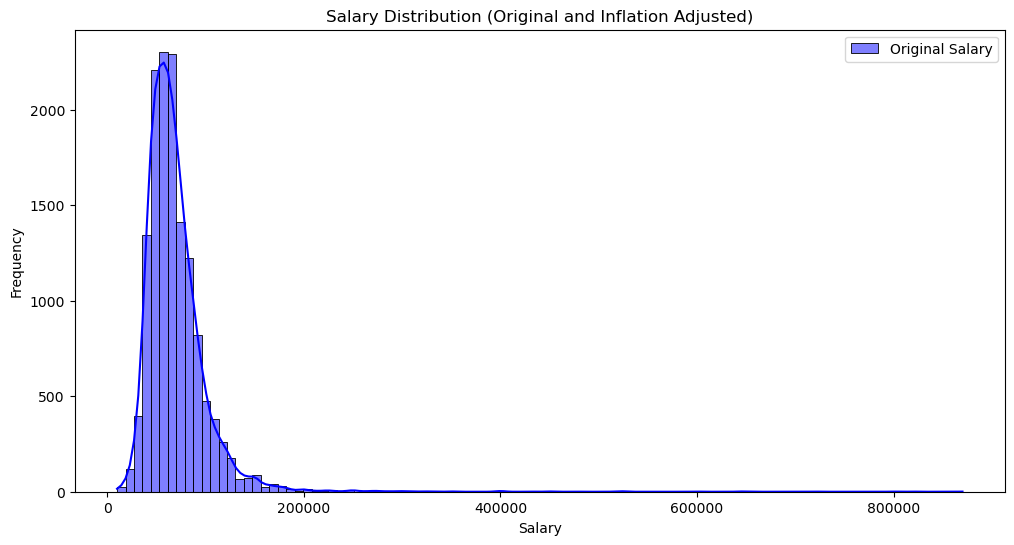

In [3]:
plt.figure(figsize=(12, 6))

# Plot original salary
sns.histplot(df_fulltime["Salary"], bins=100, kde=True, color='blue', label='Original Salary')

# Plot inflation-adjusted salary, uncomment to see both
# sns.histplot(df_fulltime["Inflation Adjusted Salary"], bins=100, kde=True, color='orange', label='Inflation Adjusted Salary')

plt.title("Salary Distribution (Original and Inflation Adjusted)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.show()

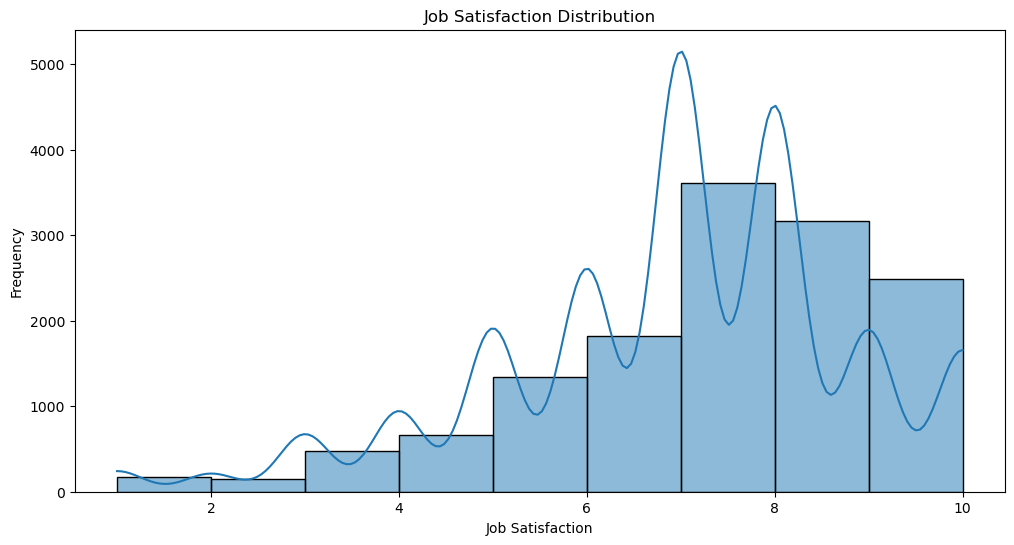

In [4]:
#plot income distribution
import matplotlib.pyplot as plt
import seaborn as sns

#plot job satisfaction distribution (there is only values 0-10)
plt.figure(figsize=(12, 6))
sns.histplot(df_fulltime['Job Satisfaction'], bins=9, kde=True)
plt.title("Job Satisfaction Distribution")
plt.xlabel("Job Satisfaction")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ipywidgets import interact, interactive_output, Dropdown, widgets

#ignore future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def plot_salary_by_column_by_year(column_name, filter_value):
    df=df_fulltime
    # Filter the DataFrame by the selected job title
    if filter_value == 'All':
        filtered_df = df
    else:    
        filtered_df = df[df[column_name] == filter_value]

    # Calculate the median salary for each year
    median_salary = filtered_df.groupby('Year')['Salary'].median().reset_index()

    # Plotting
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Year', y='Salary', data=filtered_df, showfliers=False) #hue="Year", palette='Set3'
    
    # Move legend to the side
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Year')

    plt.plot(median_salary.index, median_salary['Salary'], color='red', marker='o', label='Median Salary')
    
    plt.title(f'Salary Distribution for {filter_value} by Year')
    plt.xlabel('Year')
    plt.ylabel('Salary')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Function to create the interactive plot with dynamic filter values
def create_interactive_plot():
    # Dropdown for selecting the column
    column_name_dropdown = Dropdown(options=["Job Title", "Firm Type"], description="Column")
    
    # Create an empty filter dropdown that will be updated
    filter_value_dropdown = Dropdown(description='Filter')
    
    # Function to update filter_value options based on selected column_name
    def update_filter_value_options(*args):
        selected_column = column_name_dropdown.value
        unique_values = ['All'] + list(df_fulltime[selected_column].unique())
        filter_value_dropdown.options = unique_values

    # Attach the update function to the column_name dropdown changes
    column_name_dropdown.observe(update_filter_value_options, 'value')
    
    # Initialize filter dropdown with the default column selected
    update_filter_value_options()

    # Display the widgets and the plot
    ui = widgets.VBox([column_name_dropdown, filter_value_dropdown])
    out = interactive_output(plot_salary_by_column_by_year, {
        'column_name': column_name_dropdown, 
        'filter_value': filter_value_dropdown
    })
    
    display(ui, out)

# Call the function to display the interactive plot
create_interactive_plot()

Output()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, Dropdown

def plot_median_salary(column_name, n=15):
    # Get the top N values by counts of people with that value
    top_n_vals = df_fulltime[column_name].value_counts().nlargest(n)
    vals = top_n_vals.index

    # Create a list to hold (value, median_salary) tuples for the legend
    median_salaries = []
    
    # Set up the figure
    plt.figure(figsize=(12, 6))

    # Loop through each value and plot the median salary trend
    for val in vals:
        # Filter the DataFrame by the current value
        filtered_df = df_fulltime[df_fulltime[column_name] == val]

        # Calculate the median salary by year
        salary_stats = filtered_df.groupby('Year')['Salary'].median().reset_index()

        # Plot the median salary trend
        line, = plt.plot(salary_stats['Year'], salary_stats['Salary'], marker='o', label=val)

        # Store the overall median salary for the current value
        overall_median = filtered_df['Salary'].median()
        median_salaries.append((val, overall_median, line))

    # Sort median salaries for the legend, but keep track of the original lines
    sorted_median_salaries = sorted(median_salaries, key=lambda x: x[1], reverse=True)

    # Create a custom legend based on the sorted median salaries
    custom_legend = [f"{val}: {median:.0f}" for val, median, _ in sorted_median_salaries]
    handles = [line for _, _, line in sorted_median_salaries]  # Extract lines for legend

    # Plot settings
    plt.title(f'Median Salary Trends by {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Median Salary')
    plt.xticks(salary_stats['Year'])
    plt.legend(handles, custom_legend, title=column_name, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

    #print(top_n_vals)

# Call the function with interact
interact(plot_median_salary, 
         n=15,
         column_name=Dropdown(options=["Job Title", "Firm Type", "Firm Size", "Licensed", "Years of Experience", "Age", "Gender", "Job Satisfaction"], description='Column Name'))


interactive(children=(Dropdown(description='Column Name', options=('Job Title', 'Firm Type', 'Firm Size', 'Lic…

<function __main__.plot_median_salary(column_name, n=15)>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def sort(vals, column_name, sorting_column_name):
    # Sort the job titles by mean satisfaction
    if column_name == "Years of Experience":
        experience_order = ["< 1", "1", "2", "3", "3-5", "6-7", "8-10", "11-15", "16-20", "21-25", "26-30", "31-40", "> 40"]

        # Convert the 'Years of Experience' column to a categorical type with the specified order
        vals['Years of Experience'] = pd.Categorical(vals['Years of Experience'], categories=experience_order, ordered=True)

        # Sort the DataFrame by the 'Years of Experience' column
        vals = vals.sort_values('Years of Experience')

    elif column_name not in ["Age", "Job Satisfaction"]:
        vals = vals.sort_values(by=sorting_column_name)
    return vals

def process_counts (df, column_name, n=20):
        #if column name is in ["Undergraduate School", "Graduate School", "Post-Graduate School"] then we want to plot the top 20:
    if column_name in ["Undergraduate School", "Graduate School", "Location"]:
        response_counts = df[column_name].value_counts().nlargest(n).reset_index(name='Response Count')
    else:
        # Calculate the median salary across all years for each job title
        response_counts = df.groupby(column_name).size().reset_index(name='Response Count')

    # Sort the job titles by median salary
    response_counts = sort(response_counts, column_name, "Response Count")

    return response_counts

def process_median_salary(df, column_name, n=20):
    if column_name in ["Undergraduate School", "Graduate School", "Location"]:
        # Calculate the top 20 locations by responder count
        top_responses = df[column_name].value_counts().nlargest(n).index
        # Filter the DataFrame to include only the top locations
        filtered_df = df[df[column_name].isin(top_responses)]

         # Calculate the median salary across all years for each job title
        median_salary_per_job = filtered_df.groupby(column_name)['Salary'].median().reset_index()
    else:
        median_salary_per_job = df.groupby(column_name)['Salary'].median().reset_index()

    # Sort the job titles by median salary
    median_salary_per_job = sort(median_salary_per_job, column_name, "Salary")

    return median_salary_per_job

def process_mean_satisfaction(df, column_name, n=20):
    if column_name in ["Undergraduate School", "Graduate School", "Location"]:
        # Calculate the top 20 locations by responder count
        top_responses = df[column_name].value_counts().nlargest(n).index
        # Filter the DataFrame to include only the top locations
        filtered_df = df[df[column_name].isin(top_responses)]

         # Calculate the median salary across all years for each job title
        mean_satisfaction_per_job = filtered_df.groupby(column_name)['Job Satisfaction'].mean().reset_index()
    else:
        mean_satisfaction_per_job = df.groupby(column_name)['Job Satisfaction'].mean().reset_index()

    mean_satisfaction_per_job = sort(mean_satisfaction_per_job, column_name, "Job Satisfaction")

    return mean_satisfaction_per_job

def plot_response_by_column(df):

    def plotting_func(column_name, feature_type = 'Response Count'):
        if feature_type == 'Response Count':
            response = process_counts(df, column_name)
        elif feature_type == 'Salary':
            response = process_median_salary(df, column_name)
        else:
            response = process_mean_satisfaction(df, column_name)


        # Set up the figure
        plt.figure(figsize=(12, 6))

        # Create a bar plot for the sorted median salaries
        plt.bar(response[column_name], response[feature_type], color='skyblue')

        # Plot settings
        plt.title(f'{feature_type} by {column_name}')
        plt.ylabel(feature_type)
        plt.xlabel(column_name)
        plt.xticks(rotation=45, ha='right',va='top')
        plt.grid(True, axis='x')
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()

    return plotting_func

# Call the function to plot
interact(plot_response_by_column(df_fulltime), feature_type=Dropdown(options=["Response Count", "Salary", "Job Satisfaction"]),column_name=Dropdown(options=["Job Satisfaction", "Job Title", "Firm Type", "Firm Size", "Licensed", "Years of Experience", "Age", "Gender", "Location", "Undergraduate School", "Graduate School"], description='Column Name'))

interactive(children=(Dropdown(description='Column Name', options=('Job Satisfaction', 'Job Title', 'Firm Type…

<function __main__.plot_response_by_column.<locals>.plotting_func(column_name, feature_type='Response Count')>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

def plot_mean_satisfaction_by_column(column_name):
    df = df_fulltime  # Assuming df_fulltime is your DataFrame
    
    # Calculate the mean job satisfaction across the selected column
    mean_satisfaction_per_job = df.groupby(column_name)['Job Satisfaction'].mean().reset_index()

    # Conditional sorting: retain natural order for "Age" and "Years of Experience"
    if column_name == "Years of Experience":
        experience_order = ["< 1", "1", "2", "3", "3-5", "6-7", "8-10", "11-15", "16-20", "21-25", "26-30", "31-40", "> 40"]

        # Convert the 'Years of Experience' column to a categorical type with the specified order
        mean_satisfaction_per_job['Years of Experience'] = pd.Categorical(mean_satisfaction_per_job['Years of Experience'], categories=experience_order, ordered=True)

        # Sort the DataFrame by the 'Years of Experience' column
        mean_satisfaction_per_job = mean_satisfaction_per_job.sort_values('Years of Experience')

    elif column_name !="Age":
        mean_satisfaction_per_job = mean_satisfaction_per_job.sort_values(by='Job Satisfaction')
        

    # Set up the figure
    plt.figure(figsize=(12, 6))

    # Create a horizontal bar plot for the mean job satisfaction
    plt.bar(mean_satisfaction_per_job[column_name], mean_satisfaction_per_job['Job Satisfaction'], color='skyblue')

    # Plot settings
    plt.title(f'Mean Job Satisfaction by {column_name}')
    plt.ylabel('Mean Job Satisfaction')
    plt.xlabel(column_name)
    plt.xticks(rotation=45, ha='right',va='top')
    plt.grid(True, axis='x')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Call the function to plot with an interactive dropdown
interact(plot_mean_satisfaction_by_column, 
         column_name=Dropdown(options=["Job Title", "Firm Type", "Firm Size", "Licensed", 
                                       "Years of Experience", "Age", "Gender"], 
                              description='Column Name'))


interactive(children=(Dropdown(description='Column Name', options=('Job Title', 'Firm Type', 'Firm Size', 'Lic…

<function __main__.plot_mean_satisfaction_by_column(column_name)>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown, Checkbox

def plot_median_salary_by_column( column_name, grouped=False):
    # Check if the user wants a grouped chart
    if grouped:
        # Calculate the median salary by column and gender
        salary_data = df_fulltime.groupby([column_name, 'Licensed'])['Salary'].median().reset_index()
        
        # Plotting grouped bar chart
        plt.figure(figsize=(12, 6))
        sns.barplot(data=salary_data, y='Salary', x=column_name, hue='Licensed', palette='Set2')
        
        # Plot settings
        plt.title(f'Grouped Median Salary by {column_name}')
        plt.xlabel('Median Salary')
        plt.ylabel(column_name)
        plt.grid(True, axis='x')
        plt.legend(title='Gender')
        
    else:
        # Calculate the median salary across all years for each category
        median_salary_per_job = df_fulltime.groupby(column_name)['Salary'].median().reset_index()

        # Sort the categories by median salary
        median_salary_per_job = median_salary_per_job.sort_values(by='Salary')

        # Set up the figure
        plt.figure(figsize=(12, 6))

        # Create a horizontal bar plot for the sorted median salaries
        plt.bar(median_salary_per_job[column_name], median_salary_per_job['Salary'], color='skyblue')

        # Plot settings
        plt.title(f'Median Salary by {column_name}')
        plt.ylabel('Median Salary')
        plt.xlabel(column_name)
        plt.grid(True, axis='x')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Call the function to plot with an additional dropdown for grouping
interact(plot_median_salary_by_column, 
         column_name=Dropdown(options=["Job Title", "Firm Type", "Firm Size", "Licensed", "Years of Experience", "Age", "Job Satisfaction"], description='Column Name'),
         grouped=Checkbox(value=False, description='Show Grouped Bar Chart'))


interactive(children=(Dropdown(description='Column Name', options=('Job Title', 'Firm Type', 'Firm Size', 'Lic…

<function __main__.plot_median_salary_by_column(column_name, grouped=False)>

In [10]:
import pandas as pd

def create_matrices(df):
    # First, ensure 'Years of Experience' and 'Firm Type' are categorical
    experience_order = ["< 1", "1", "2", "3", "3-5", "6-7", "8-10", "11-15", "16-20", "21-25", "26-30", "31-40", "> 40"]

    df['Years of Experience'] = pd.Categorical(df['Years of Experience'], categories=experience_order, ordered=True)
    df['Firm Type'] = pd.Categorical(df['Firm Type'])

    # Matrix 1: Job Satisfaction (mean)
    job_satisfaction_matrix = df.pivot_table(index='Firm Type', columns='Years of Experience', 
                                             values='Job Satisfaction', aggfunc='mean')

    # Matrix 2: Salary (median)
    salary_matrix = df.pivot_table(index='Firm Type', columns='Years of Experience', 
                                   values='Salary', aggfunc='median')

    # Matrix 3: Response Count
    response_count_matrix = df.pivot_table(index='Firm Type', columns='Years of Experience', 
                                           values='Job Satisfaction', aggfunc='count')

    return job_satisfaction_matrix, salary_matrix, response_count_matrix

# Sample usage
job_satisfaction_matrix, salary_matrix, response_count_matrix = create_matrices(df_fulltime)

# Display the matrices
print("Job Satisfaction Matrix:")
print(job_satisfaction_matrix)

print("\nSalary Matrix:")
print(salary_matrix)

print("\nResponse Count Matrix:")
print(response_count_matrix)


Job Satisfaction Matrix:
Years of Experience       < 1         1         2         3       3-5  \
Firm Type                                                               
Boutique             7.294118  7.157895  7.115756  7.010381  6.847826   
Corporate            7.194332  7.139683  6.762208  6.917453  6.720085   
Individual           7.043956  6.608247  6.716312  6.814815  6.641304   
Other                7.220930  7.145161  7.070968  7.194915  7.003226   
Starchitect          7.263158  6.571429  6.980000  6.666667  6.575472   

Years of Experience       6-7      8-10     11-15     16-20     21-25  \
Firm Type                                                               
Boutique             7.032720  7.011013  7.111111  7.560000  7.811594   
Corporate            6.694667  6.760841  6.943103  7.037313  7.059603   
Individual           6.345133  6.794393  6.807692  7.148936  7.962963   
Other                6.953975  6.936275  6.868020  7.370787  7.229508   
Starchitect          6.23

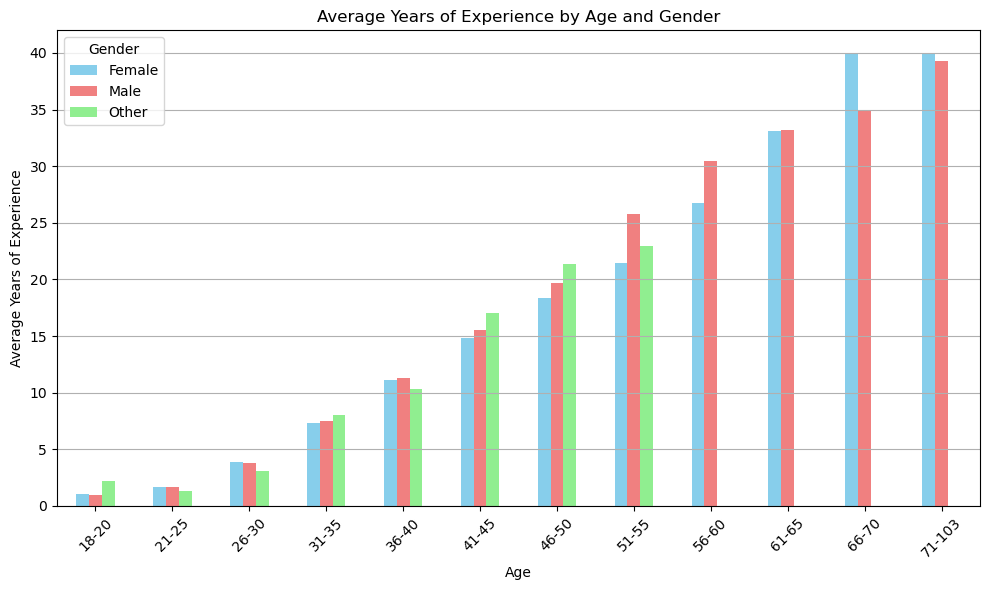

In [11]:
experience_mapping = {

      '< 1':0.5,
      '1':1,
      '2':2,
      '3':3,
      '3-5':4,
      '6-7':6.5,
      '8-10':9,
      '11-15':13,
      '16-20':18,
      '21-25':23,   
      '26-30':28,  
      '31-40':35.5,
      '> 40':40
}

def plot_experience_vs_age_gender(df):
    

    # Map years of experience to median values
    df['Experience_Median'] = df['Years of Experience'].map(experience_mapping)
    #set to float
    df['Experience_Median'] = df["Experience_Median"].astype(float)

    # Group by Age and Gender, then calculate the mean of the median experience values
    mean_experience = df.groupby(['Age', 'Gender'])['Experience_Median'].mean().reset_index()

    # Pivot to make it suitable for a grouped bar plot
    experience_pivot = mean_experience.pivot(index='Age', columns='Gender', values='Experience_Median')

    # Plotting
    experience_pivot.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title('Average Years of Experience by Age and Gender')
    plt.xlabel('Age')
    plt.ylabel('Average Years of Experience')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_experience_vs_age_gender(df_fulltime)


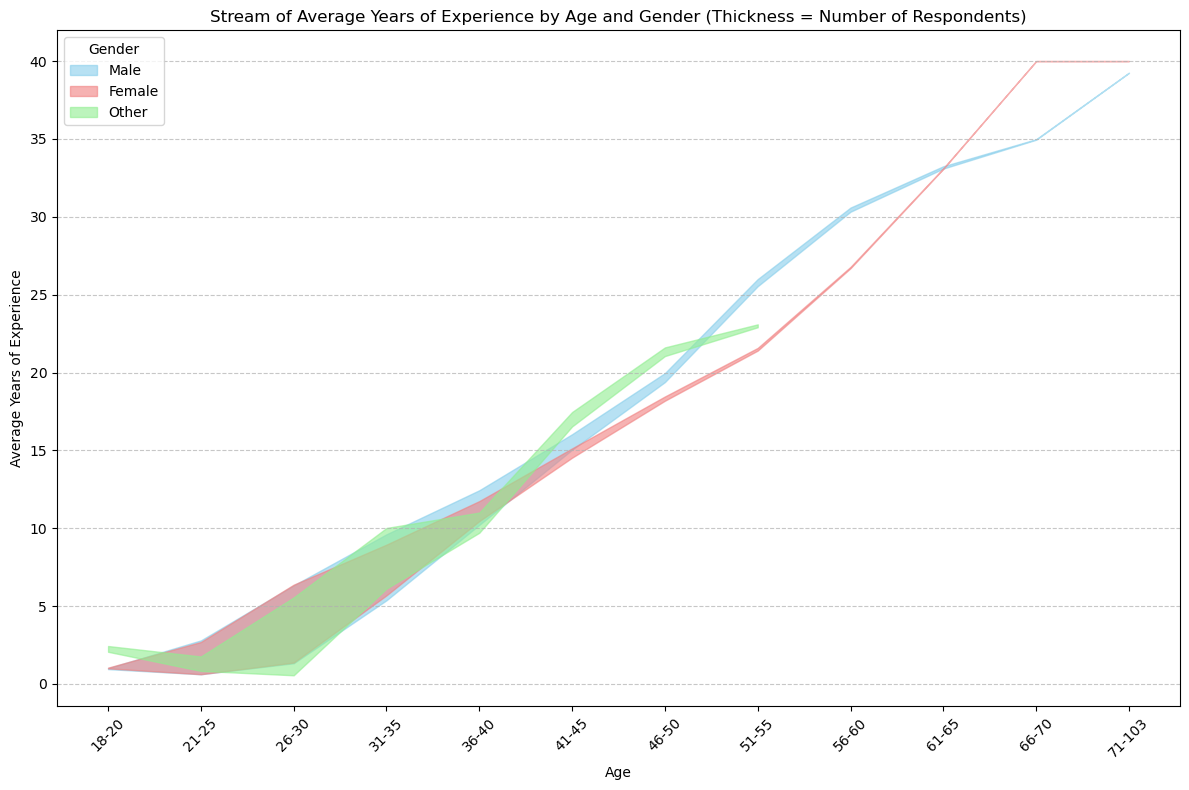

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_experience_vs_age_gender_stream(df):
    # Map years of experience to median values
    df['Experience_Median'] = df['Years of Experience'].map(experience_mapping)
    df['Experience_Median'] = df["Experience_Median"].astype(float)

    # Group by Age and Gender, calculate the mean of the median experience values and count of respondents
    grouped_data = df.groupby(['Age', 'Gender']).agg({
        'Experience_Median': 'mean', 
        'Gender': 'count'  # count of respondents
    }).rename(columns={'Gender': 'Respondent_Count'}).reset_index()

    # Pivot to get experience data in the right format for plotting
    experience_pivot = grouped_data.pivot(index='Age', columns='Gender', values='Experience_Median')
    count_pivot = grouped_data.pivot(index='Age', columns='Gender', values='Respondent_Count')

    # Plot settings
    plt.figure(figsize=(12, 8))

    # Create the stream plot effect by filling between lines, varying thickness with respondent count
    genders = ['Male', 'Female', 'Other']
    colors = ['skyblue', 'lightcoral', 'lightgreen']
    for i, gender in enumerate(genders):
        if gender in experience_pivot.columns:
            experience_vals = experience_pivot[gender].values
            respondent_counts = count_pivot[gender].fillna(0).values

            # Normalize the respondent counts to scale the thickness
            respondent_counts = respondent_counts / respondent_counts.max() * 5  # scale factor for thickness

            # Create a "stream" effect by filling between lines with variable width
            plt.fill_between(experience_pivot.index, experience_vals - respondent_counts / 2, 
                             experience_vals + respondent_counts / 2, alpha=0.6, color=colors[i], label=gender)

    # Plot settings
    plt.title('Stream of Average Years of Experience by Age and Gender (Thickness = Number of Respondents)')
    plt.xlabel('Age')
    plt.ylabel('Average Years of Experience')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Gender', loc='upper left')
    plt.tight_layout()
    plt.show()

#df_filtered = df_fulltime[~df_fulltime['Age'].isin(['61-65','66-70', '71-103'])]
plot_experience_vs_age_gender_stream(df_fulltime)


In [13]:
df_fulltime['Years of Experience'].map(experience_mapping)


0        6.5
1        3.0
2        2.0
3        6.5
4        4.0
        ... 
13850    4.0
13851    2.0
13852    9.0
13853    4.0
13854    1.0
Name: Years of Experience, Length: 13855, dtype: category
Categories (13, float64): [0.5 < 1.0 < 2.0 < 3.0 ... 23.0 < 28.0 < 35.5 < 40.0]

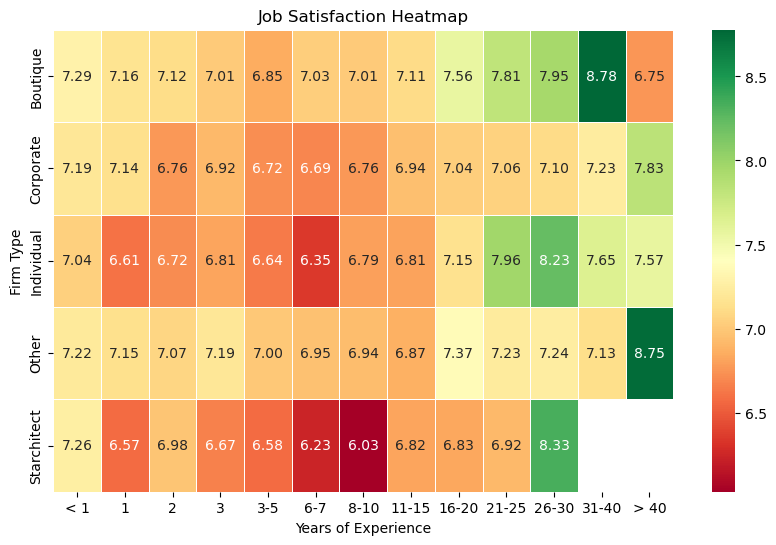

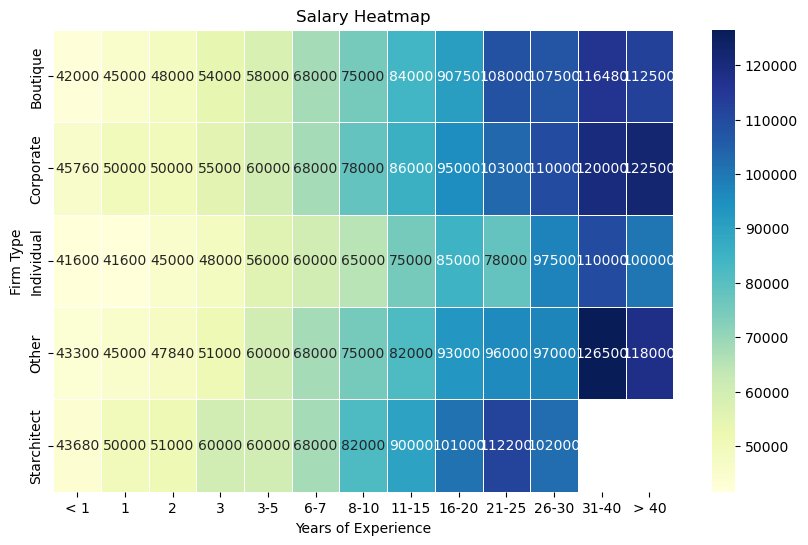

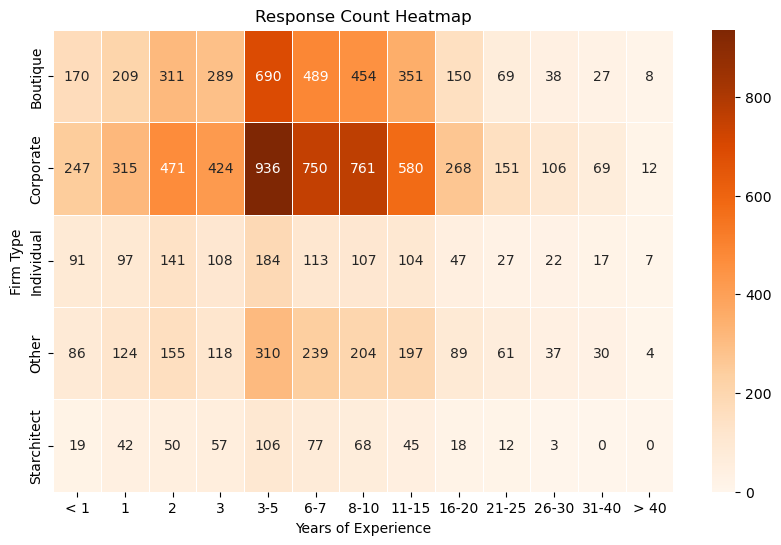

In [14]:
def plot_heatmap(matrix, title, cmap="Blues", fmt='.0f'):
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, cmap=cmap, fmt=fmt, linewidths=0.5)
    plt.title(title)
    plt.xlabel('Years of Experience')
    plt.ylabel('Firm Type')
    plt.show()

# Sample usage
job_satisfaction_matrix, salary_matrix, response_count_matrix = create_matrices(df_fulltime)

# Visualize the matrices with color
plot_heatmap(job_satisfaction_matrix, 'Job Satisfaction Heatmap', cmap='RdYlGn', fmt='.2f')
plot_heatmap(salary_matrix, 'Salary Heatmap', cmap='YlGnBu')
plot_heatmap(response_count_matrix, 'Response Count Heatmap', cmap='Oranges')